In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
entries = ['^GDAXI','DTE.DE','SAP.DE','FME.DE','BEI.DE','DB1.DE','IFX.DE','WDI.DE','ADS.DE',
           'FIE.DE','FNTN.DE','DRW3.DE','AFX.DE','DLG.DE','SOW.DE','HNR1.DE',
           'AAPL','MSFT','IBM','PVH']
merged_quotes = pd.DataFrame()

for symbol in entries:
    ticks = yf.Ticker(symbol)
    #h = ticks.history('3mo')
    h = ticks.history(start='2020-01-01', end='2020-04-20')
    history = h['Close']
    if merged_quotes.size == 0:
        merged_quotes = history.to_frame()
    else:
        merged_quotes = pd.merge(merged_quotes, history.to_frame(), on='Date')

In [3]:
merged_quotes.columns=entries
merged_quotes

,^GDAXI,DTE.DE,SAP.DE,FME.DE,BEI.DE,DB1.DE,IFX.DE,WDI.DE,ADS.DE,FIE.DE,FNTN.DE,DRW3.DE,AFX.DE,DLG.DE,SOW.DE,HNR1.DE,AAPL,MSFT,IBM,PVH
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,13385.93,13.88,122.00,65.84,105.65,141.15,20.43,112.40,291.55,71.50,20.80,55.45,112.87,46.94,31.33,174.5,299.64,160.18,134.02,105.23
2020-01-03,13219.14,13.88,120.46,65.50,105.65,139.40,20.14,112.90,291.95,71.45,20.60,55.35,112.47,45.84,30.78,173.9,296.73,158.19,132.95,103.17
2020-01-06,13126.99,13.85,119.56,65.02,106.00,138.35,19.80,111.85,289.65,72.15,20.34,55.25,113.07,45.00,30.78,173.1,299.09,158.60,132.71,105.52
2020-01-07,13226.83,13.87,120.10,65.10,105.75,139.15,20.78,111.85,294.75,71.60,20.75,55.60,113.96,46.28,31.42,174.1,297.68,157.15,132.80,105.53
2020-01-08,13320.18,13.82,120.82,65.22,106.20,142.25,21.05,111.75,302.85,71.70,20.73,56.00,115.45,46.50,31.89,173.5,302.47,159.65,133.91,106.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-09,10564.74,12.36,110.00,63.24,91.40,132.65,16.23,112.88,224.30,58.10,16.31,86.50,95.40,27.76,28.28,138.1,267.99,165.14,121.50,49.51
2020-04-14,10696.56,12.52,112.00,64.06,94.26,135.65,16.84,121.90,224.90,59.30,16.63,81.90,94.05,27.81,28.80,135.0,287.05,173.70,123.91,47.96
2020-04-15,10279.76,12.19,108.30,62.42,92.98,133.85,15.30,117.38,214.30,58.60,16.01,85.10,90.95,26.44,28.24,132.9,284.43,171.88,118.69,42.33


In [4]:
correlation_matrix = merged_quotes.pct_change().corr()
correlation_matrix

,^GDAXI,DTE.DE,SAP.DE,FME.DE,BEI.DE,DB1.DE,IFX.DE,WDI.DE,ADS.DE,FIE.DE,FNTN.DE,DRW3.DE,AFX.DE,DLG.DE,SOW.DE,HNR1.DE,AAPL,MSFT,IBM,PVH
^GDAXI,1.000000,0.824761,0.893948,0.611524,0.676795,0.820453,0.853374,0.785628,0.767401,0.781633,0.806627,-0.027285,0.768988,0.748042,0.661550,0.906842,0.640325,0.616514,0.720402,0.742541
DTE.DE,0.824761,1.000000,0.652403,0.586206,0.520946,0.633853,0.645322,0.585620,0.682729,0.588811,0.760320,-0.091073,0.633585,0.562044,0.491738,0.727563,0.463676,0.484503,0.537518,0.561974
SAP.DE,0.893948,0.652403,1.000000,0.605496,0.636874,0.724219,0.763378,0.672316,0.656461,0.688839,0.675471,0.144789,0.752637,0.716933,0.690106,0.759342,0.612380,0.591518,0.708243,0.627777
FME.DE,0.611524,0.586206,0.605496,1.000000,0.493115,0.508562,0.490782,0.469537,0.403573,0.368793,0.581402,0.089852,0.462471,0.370000,0.488158,0.527339,0.499790,0.465031,0.535617,0.415368
BEI.DE,0.676795,0.520946,0.636874,0.493115,1.000000,0.551930,0.426988,0.576207,0.520587,0.353737,0.579201,0.063960,0.426051,0.294675,0.438790,0.746717,0.548699,0.499120,0.593696,0.430337
DB1.DE,0.820453,0.633853,0.724219,0.508562,0.551930,1.000000,0.732607,0.652940,0.573262,0.735048,0.622034,-0.052242,0.737201,0.618531,0.499455,0.709919,0.561327,0.563304,0.586342,0.588726
IFX.DE,0.853374,0.645322,0.763378,0.490782,0.426988,0.732607,1.000000,0.673505,0.666850,0.771696,0.675379,-0.081757,0.715268,0.754095,0.661557,0.706491,0.587071,0.557907,0.652858,0.712326
WDI.DE,0.785628,0.585620,0.672316,0.469537,0.576207,0.652940,0.673505,1.000000,0.701160,0.645640,0.531447,0.067093,0.572289,0.607906,0.565896,0.757000,0.516794,0.414076,0.493384,0.578013
ADS.DE,0.767401,0.682729,0.656461,0.403573,0.520587,0.573262,0.666850,0.701160,1.000000,0.622227,0.542813,0.051640,0.725625,0.569499,0.496372,0.737923,0.344960,0.304427,0.462986,0.607274
FIE.DE,0.781633,0.588811,0.688839,0.368793,0.353737,0.735048,0.771696,0.645640,0.622227,1.000000,0.518984,-0.091604,0.708586,0.776980,0.517059,0.636348,0.444594,0.430165,0.543597,0.578970


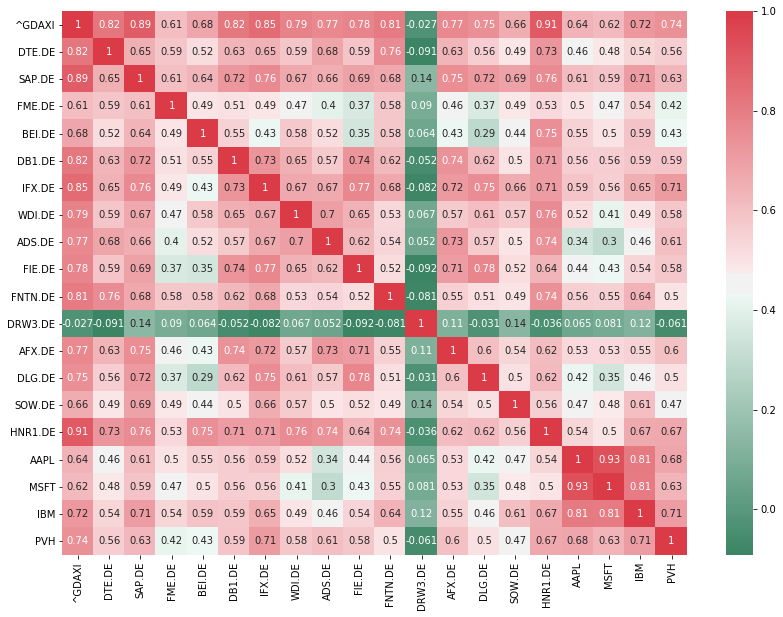

In [5]:
fig, ax = plt.subplots(figsize=(14,10))

cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(correlation_matrix,
            cmap = cmap,
            annot=True)